# 911 Calls Capstone Project

For this capstone project we will be analyzing some 911 call data from [Kaggle](https://www.kaggle.com/mchirico/montcoalert). The data contains the following fields:

* lat : String variable, Latitude
* lng: String variable, Longitude
* desc: String variable, Description of the Emergency Call
* zip: String variable, Zipcode
* title: String variable, Title
* timeStamp: String variable, YYYY-MM-DD HH:MM:SS
* twp: String variable, Township
* addr: String variable, Address
* e: String variable, Dummy variable (always 1)

***
## Goal

In this project we will answer some question and conduct data exploratory to gain some insight from the dataset.

## Overview
1. Data and Setup


## 1. Data and Setup

***
**Import numpy and pandas libraries**

In [1]:
import pandas as pd
import numpy as np

**Import visualization libraries and set %matplotlib inline.**

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Ignore Warnings**

In [3]:
import warnings
warnings.filterwarnings("ignore")

**Read in the csv file as a dataframe called df**

In [4]:
df = pd.read_csv(r'D:\DATA SCIENTIST\UDEMY\Py_DS_ML_Bootcamp-master\Refactored_Py_DS_ML_Bootcamp-master\10-Data-Capstone-Projects\911.csv')

**Check the head of df**

In [5]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


**Check the describe() of the df**

In [6]:
df.describe()

,lat,lng,zip,e
count,99492.000000,99492.000000,86637.000000,99492.0
mean,40.159526,-75.317464,19237.658298,1.0
std,0.094446,0.174826,345.344914,0.0
min,30.333596,-95.595595,17752.000000,1.0
25%,40.100423,-75.392104,19038.000000,1.0
50%,40.145223,-75.304667,19401.000000,1.0
75%,40.229008,-75.212513,19446.000000,1.0
max,41.167156,-74.995041,77316.000000,1.0


**Check the info() of the df**

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99492 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   lat        99492 non-null  float64
 1   lng        99492 non-null  float64
 2   desc       99492 non-null  object 
 3   zip        86637 non-null  float64
 4   title      99492 non-null  object 
 5   timeStamp  99492 non-null  object 
 6   twp        99449 non-null  object 
 7   addr       98973 non-null  object 
 8   e          99492 non-null  int64  
dtypes: float64(3), int64(1), object(5)
memory usage: 6.8+ MB


***
**Findings**
Based on some sample data and data information, the following information si obtained :
1. We have 9 columns and 99492 entries. Based on non_null count on each column, it can be seen that there are some missing values in the column `zip`, `twp` and `addr`, will use **.isna()** to confirm it.
2. There are some types of data in this data set that are not applicable to some columns, therefor we will change column `timestamp` to date_time and column `zip` to integer.

## 2. Data Cleaning and Preparation
***

### 2.1 Handling Missing Values

In [8]:
# checking missing values of the df
df.isna().sum()

lat              0
lng              0
desc             0
zip          12855
title            0
timeStamp        0
twp             43
addr           519
e                0
dtype: int64

***
There are some missing values in column `zip`, `twp` and `addr`. Based on the description on each column, the data type of these column is `string` so we will drop the missing values from our dataset.

In [9]:
df = df.dropna()

In [10]:
df.isna().sum()

lat          0
lng          0
desc         0
zip          0
title        0
timeStamp    0
twp          0
addr         0
e            0
dtype: int64

Missing values have been handled.

### 2.2 Change Data Type

In [11]:
# change data type for column zip
df['zip'] = df['zip'].astype('int')

In [12]:
# change data type for column timestamp
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        86576 non-null  float64       
 1   lng        86576 non-null  float64       
 2   desc       86576 non-null  object        
 3   zip        86576 non-null  int32         
 4   title      86576 non-null  object        
 5   timeStamp  86576 non-null  datetime64[ns]
 6   twp        86576 non-null  object        
 7   addr       86576 non-null  object        
 8   e          86576 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 6.3+ MB


Data type changes have been completed.

### 2.3 Creating new features

**In the titles column there are "Reasons/Departments" specified before the title code. These are EMS, Fire, and Traffic. Use .apply() with a custom lambda expression to create a new column called "Reason" that contains this string value.** 

*For example, if the title column value is EMS: BACK PAINS/INJURY , the Reason column value would be EMS.*

In [14]:
# making new feature reason based on title column 
df['reason'] =df['title'].apply(lambda x: x.split(':')[0])

In [15]:
df['reason']

0            EMS
1            EMS
2           Fire
3            EMS
5            EMS
          ...   
99487    Traffic
99488    Traffic
99489        EMS
99490        EMS
99491    Traffic
Name: reason, Length: 86576, dtype: object

**You can now grab specific attributes from a Datetime object by calling them. For example:**

    time = df['timeStamp'].iloc[0]
    time.hour

**You can use Jupyter's tab method to explore the various attributes you can call. Now that the timestamp column are actually DateTime objects, use .apply() to create 3 new columns called Hour, Month, and Day of Week. You will create these columns based off of the timeStamp column, reference the solutions if you get stuck on this step.**

In [16]:
# adding new column hour, day of week and month
df['hour'] = df['timeStamp'].apply(lambda time: time.hour)
df['month'] = df['timeStamp'].apply(lambda time: time.month)
df['dayofweek'] = df['timeStamp'].apply(lambda time: time.dayofweek)

**Notice how the Day of Week is an integer 0-6. Use the .map() with this dictionary to map the actual string names to the day of the week:**

    dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [17]:
dmap = {0:'Mon',1:'Tue',2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}

In [18]:
df['dayofweek'] = df['dayofweek'].map(dmap)

## 3. EDA
***

**Countplot of 911 calls by Reason.**

<AxesSubplot:xlabel='reason', ylabel='count'>

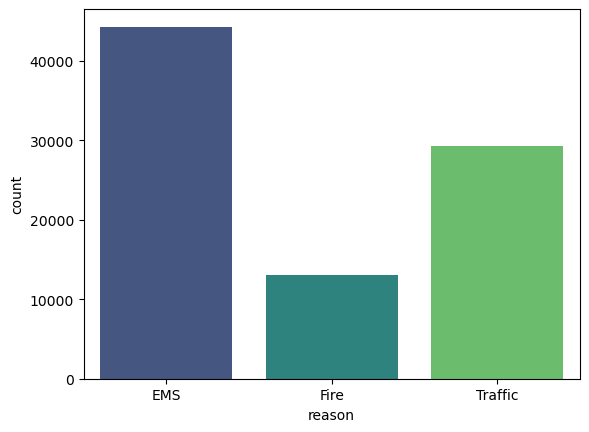

In [19]:
# plot counplot graph for reason column
sns.countplot(x='reason', data=df, palette='viridis')

Based on the graphic above, EMS is the highest reason of 911 calls.

***
**Countplot of the Day of Week and Month columns with the hue based off of the Reason column.**

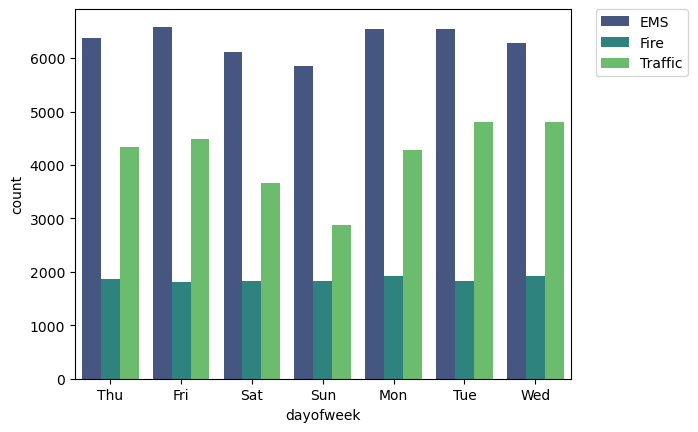

In [20]:
# plotting countplot graph for day of week
sns.countplot(x='dayofweek', data=df, hue='reason', palette='viridis')
# relocate legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

**Now do the same for Month:**

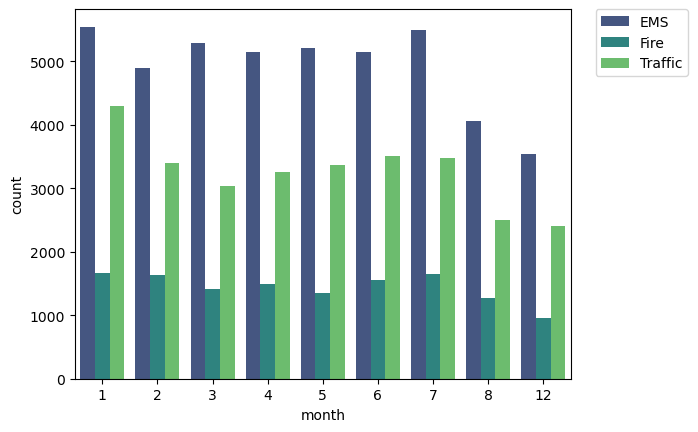

In [21]:
# plotting countplot graph for day of week
sns.countplot(x='month', data=df, hue='reason', palette='viridis')
# relocate legend
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

***
Based on the graph above, month `9 and 10` is missing,  let's see if we can maybe fill in this information by plotting the information in another way, possibly a simple line plot that fills in the missing months.

**Now create we create groupby object called `bymonth`, where we group the DataFrame by the month column and use the count() method for aggregation. Use the head() method on this returned DataFrame.**

In [22]:
# make groupby object called bymonth
bymonth = df.groupby('month').count()
bymonth.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,dayofweek
month,,,,,,,,,,,,
1,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511,11511
2,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926,9926
3,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753,9753
4,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893,9893
5,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939,9939


**Now we create a simple plot off of the dataframe indicating the count of calls per month.**

<AxesSubplot:xlabel='month'>

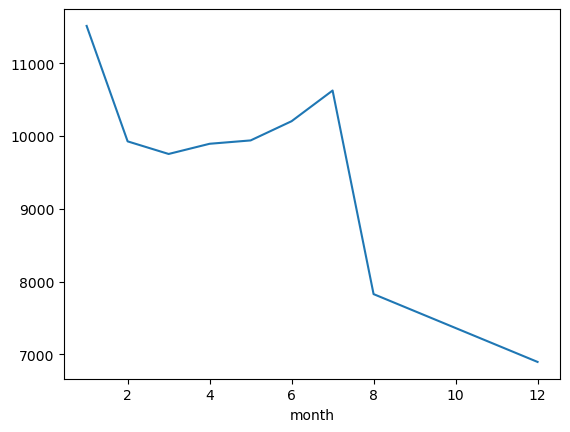

In [23]:
# making line plot using column lat
bymonth['lat'].plot()

***
Based on th graphic above, that shown downturn from month 7 to month 12.

**Now see if you can use seaborn's lmplot() to create a linear fit on the number of calls per month. Keep in mind you may need to reset the index to a column.**

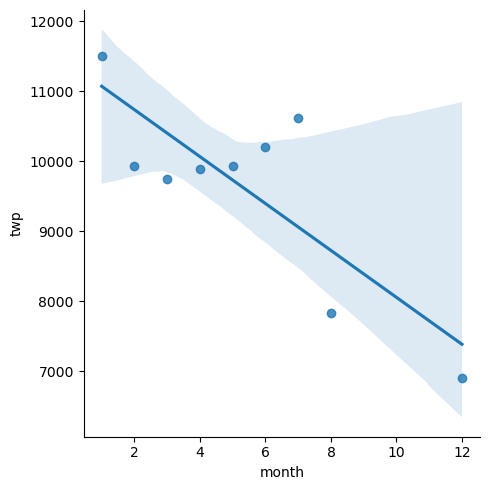

In [39]:
sns.lmplot(x='month', y='twp', data=bymonth.reset_index())

**Create a new column called 'Date' that contains the date from the timeStamp column. You'll need to use apply along with the .date() method.** 

In [27]:
t = df['timeStamp'].iloc[0]
t

Timestamp('2015-12-10 17:40:00')

In [30]:
# make new column called date
df['date'] = df['timeStamp'].apply(lambda t:t.date())

In [31]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e,reason,hour,month,dayofweek,date
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1,EMS,17,12,Thu,2015-12-10
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1,EMS,17,12,Thu,2015-12-10
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1,Fire,17,12,Thu,2015-12-10
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1,EMS,17,12,Thu,2015-12-10
5,40.253473,-75.283245,CANNON AVE & W 9TH ST; LANSDALE; Station 345;...,19446,EMS: HEAD INJURY,2015-12-10 17:40:01,LANSDALE,CANNON AVE & W 9TH ST,1,EMS,17,12,Thu,2015-12-10


**Now groupby this Date column with the count() aggregate and create a plot of counts of 911 calls.**

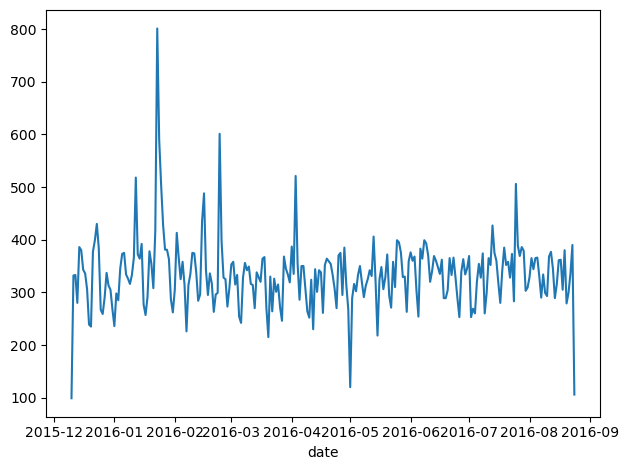

In [39]:
# show line plot of counts of call based date
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

**Now recreate this plot but create 3 separate plots with each plot representing a Reason for the 911 call**

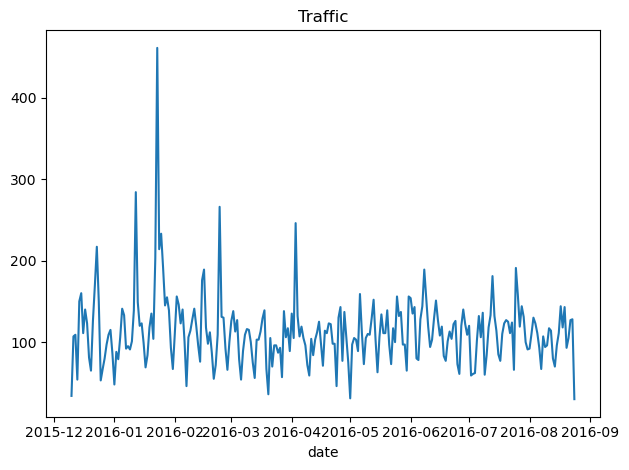

In [38]:
# show line plot of counts of call based reason traffic
df[df['reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.title('Traffic')
plt.tight_layout()

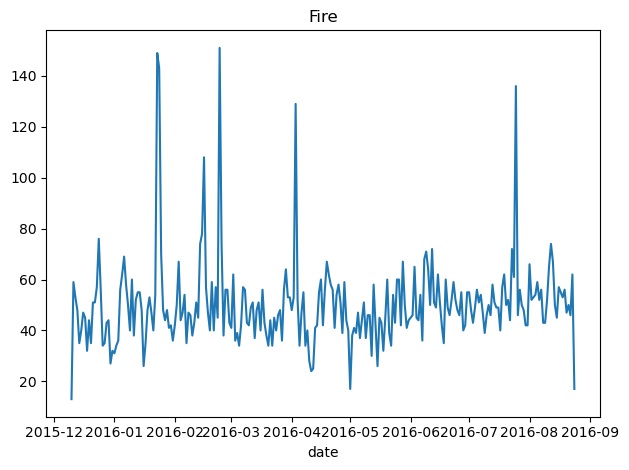

In [40]:
# show line plot of counts of call based reason fire
df[df['reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.title('Fire')
plt.tight_layout()

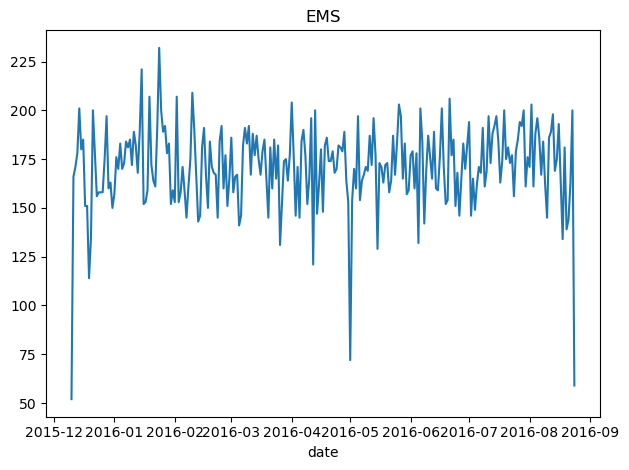

In [41]:
# show line plot of counts of call based reason ems
df[df['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.title('EMS')
plt.tight_layout()

____
**Now let's move on to creating  heatmaps with seaborn and our data. We'll first need to restructure the dataframe so that the columns become the Hours and the Index becomes the Day of the Week. There are lots of ways to do this, but I would recommend trying to combine groupby with an [unstack](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.unstack.html) method. Reference the solutions if you get stuck on this!**

In [46]:
dayhour = df.groupby(by=['dayofweek', 'hour']).count()['reason'].unstack()

**Now create a HeatMap using this new DataFrame.**

<AxesSubplot:xlabel='hour', ylabel='dayofweek'>

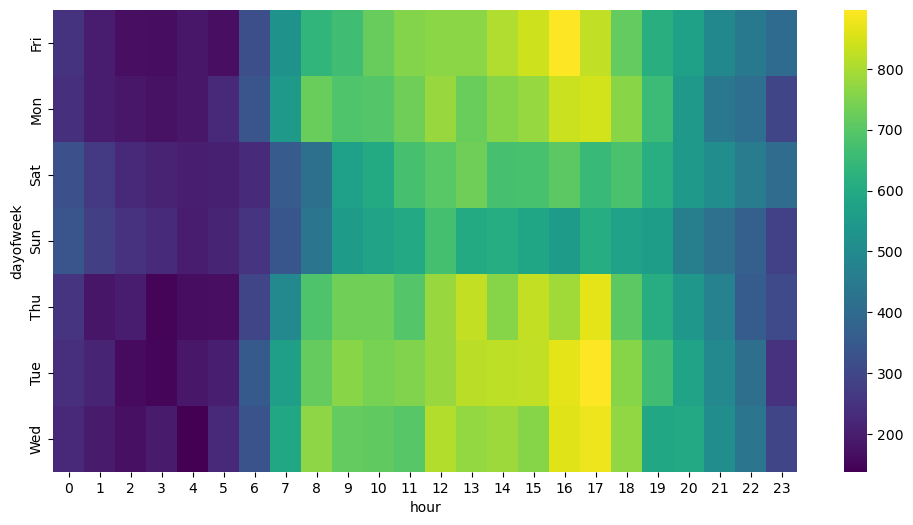

In [47]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayhour, cmap='viridis')

***
Based on heatmap graphic, that shown increasing 911 calls around peak hour which from 13 until 17 especially on weekdays.

**Now create a clustermap using this DataFrame.**

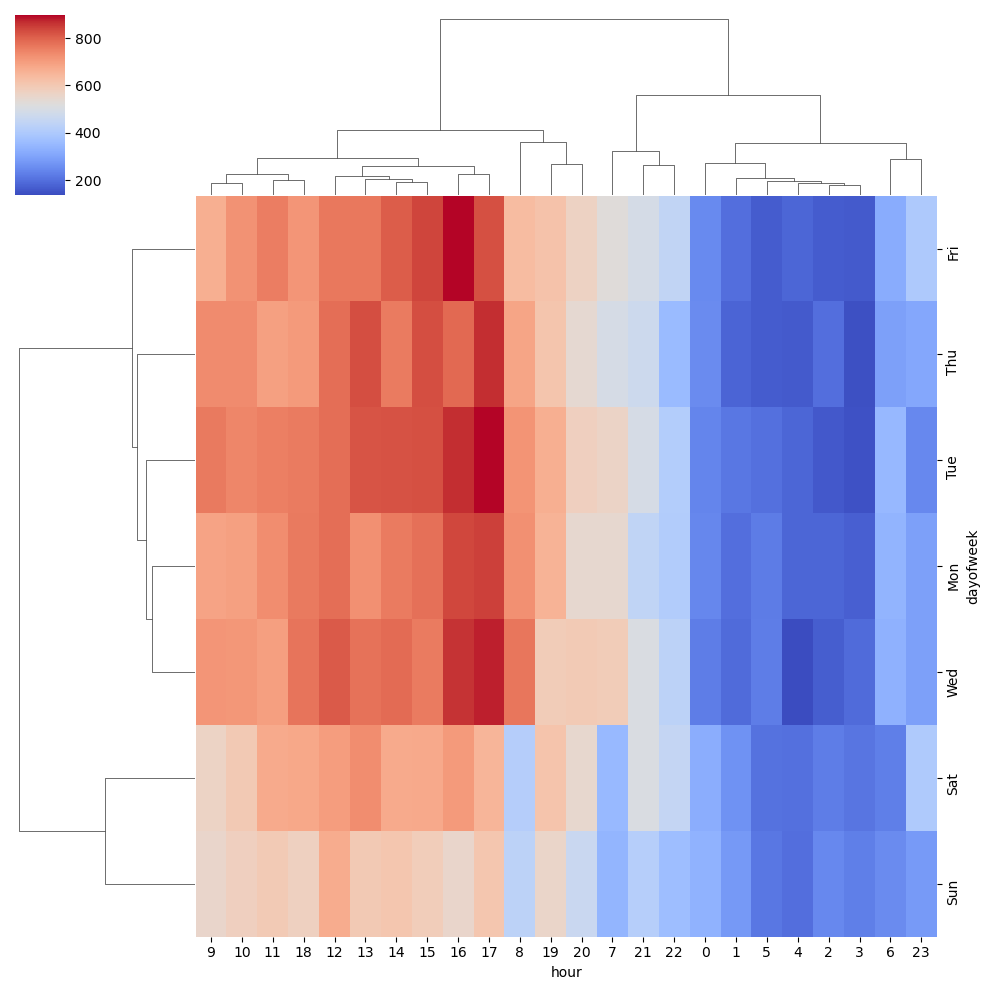

In [55]:
sns.clustermap(dayhour, cmap='coolwarm')

***
Based on clustermap, we can know that friday has the highest 911 calls.

**Now repeat these same plots and operations, for a DataFrame that shows the Month as the column.**

In [50]:
daymonth = df.groupby(by=['dayofweek', 'month']).count()['reason'].unstack()
daymonth

month,1,2,3,4,5,6,7,8,12
dayofweek,,,,,,,,,
Fri,1735,1360,1331,1683,1504,1429,1810,1123,905
Mon,1505,1658,1364,1401,1547,1395,1472,1315,1100
Sat,1979,1240,1110,1512,1264,1201,1507,955,831
Sun,1726,1058,973,1304,1230,1136,1440,878,805
Thu,1387,1391,1648,1390,1387,1800,1447,1038,1087
Tue,1697,1535,1647,1255,1658,1452,1446,1415,1092
Wed,1482,1684,1680,1348,1349,1790,1502,1105,1078


<AxesSubplot:xlabel='month', ylabel='dayofweek'>

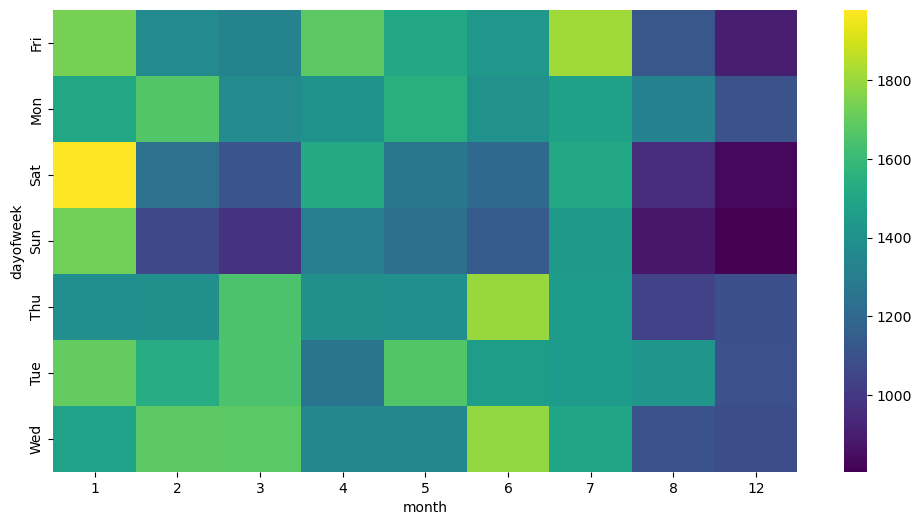

In [53]:
plt.figure(figsize=(12, 6))
sns.heatmap(daymonth, cmap='viridis')

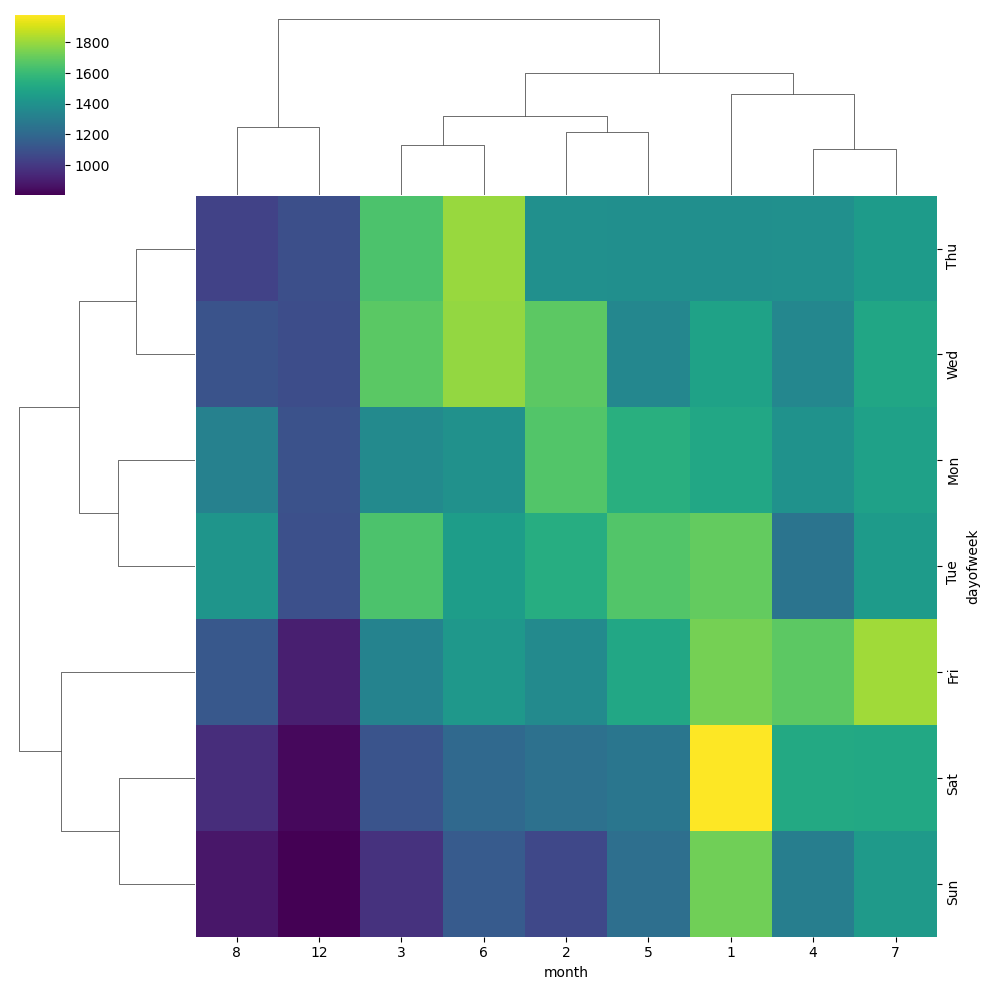

In [54]:
sns.clustermap(daymonth, cmap='viridis')

***
Based on clustermap, we can know that month 8 has the highest 911 calls.

## 4. Additional Basic Questions

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 86576 entries, 0 to 99491
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   lat        86576 non-null  float64       
 1   lng        86576 non-null  float64       
 2   desc       86576 non-null  object        
 3   zip        86576 non-null  int32         
 4   title      86576 non-null  object        
 5   timeStamp  86576 non-null  datetime64[ns]
 6   twp        86576 non-null  object        
 7   addr       86576 non-null  object        
 8   e          86576 non-null  int64         
dtypes: datetime64[ns](1), float64(2), int32(1), int64(1), object(4)
memory usage: 6.3+ MB


**What are the top 5 zipcodes for 911 calls?**

In [23]:
df['zip'].value_counts().head(5)

19401    6977
19464    6641
19403    4854
19446    4745
19406    3173
Name: zip, dtype: int64

**What are the top 5 townships (twp) for 911 calls?**

In [25]:
df['twp'].value_counts().head(5)

LOWER MERION    7202
ABINGTON        5675
NORRISTOWN      5610
POTTSTOWN       4029
CHELTENHAM      3942
Name: twp, dtype: int64

**Take a look at the 'title' column, how many unique title codes are there?**

In [28]:
df['title'].nunique()

107

**What is the most common Reason for a 911 call ?**

In [35]:
df['reason'].value_counts()

EMS        44318
Traffic    29254
Fire       13004
Name: reason, dtype: int64


## 5. General Conclusion

* We have 9 columns and 99492 entries. Based on non_null count on each column, it can be seen that there are some missing values in the column `zip`, `twp` and `addr`, will use **.isna()** to confirm it.
* There are some types of data in this data set that are not applicable to some columns, therefor we will change column `timestamp` to date_time and column `zip` to integer.
* There are some missing values in column `zip`, `twp` and `addr`. Based on the description on each column, the data type of these column is `string` so we will drop the missing values from our dataset.
* Based on heatmap graphic, that shown increasing 911 calls around peak hour which from 13 until 17 especially on weekdays.
* Based on clustermap, we can know that friday has the highest 911 calls and month 8 has the highest 911 calls.